# Table of Contents
- [sample](#section-1)
- [Section 2](#section-2)
- [Evaluate Prediction](#section-3)
   - [histograph](#section-3-1)
   - [basic statistics mean,median...](#section-3-2)
   
   - [ROC curve](#Section-3-4)

<a id='section-3'></a>
## Evaluate Prediction

<a id='section-3-1'></a>
### Histogram

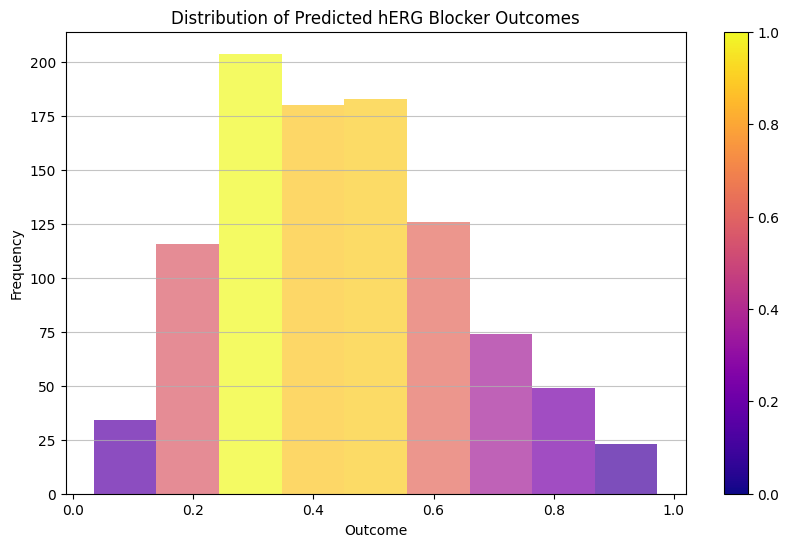

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

output = os.path.abspath('../data/final_output.csv')

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Plot a histogram of the predicted outcomes with a gradient color scheme
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['Outcome'], bins=9, alpha=0.7)

# Normalize the color gradient
fracs = n / n.max()

# Set up the colormap
cmap = plt.cm.plasma

# Apply the color gradient to each bar
for i, patch in enumerate(patches):
    color = cmap(fracs[i])
    patch.set_facecolor(color)

# Add a colorbar to show the mapping of colors to values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), orientation='vertical')

plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted hERG Blocker Outcomes')
plt.grid(axis='y', alpha=0.75)
plt.show()

<a id='section-3-1-2'></a>
### Statistics

In [10]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Display basic statistics of the 'predicted hERG blocker outcome' column
statistics = df['Outcome'].describe()

# Print the statistics
print(statistics)

count    989.000000
mean       0.445156
std        0.192860
min        0.034653
25%        0.300990
50%        0.428218
75%        0.574257
max        0.972772
Name: Outcome, dtype: float64


# Visualize above statistis data for better understanding

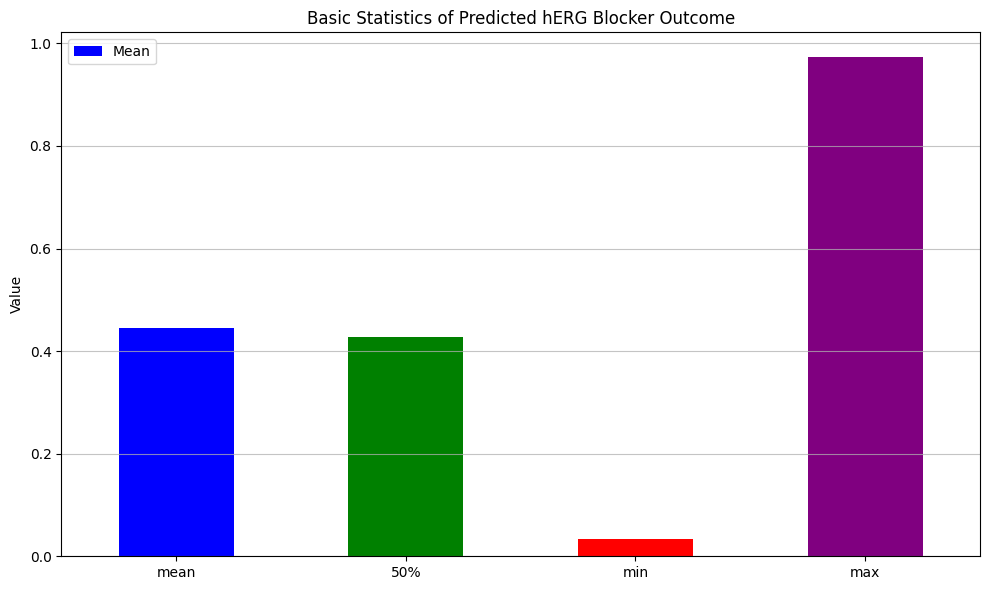

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Calculate basic statistics of the 'predicted hERG blocker outcome' column
statistics = df['Outcome'].describe()

# Extract the values for visualization
values = statistics[['mean', '50%', 'min', 'max']]

# Plot the values
plt.figure(figsize=(10, 6))
values.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.xticks(rotation=0)
plt.ylabel('Value')
plt.title('Basic Statistics of Predicted hERG Blocker Outcome')
plt.legend(['Mean', 'Median', 'Min', 'Max'])
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# grtoup

In [13]:
import pandas as pd
from scipy.stats import f_oneway

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Example: Group by a categorical variable 'category_column'
# Calculate the mean predicted outcome for each category
grouped_mean_outcome = df.groupby('category_column')['Outcome'].mean()

# Example: Perform one-way ANOVA test to compare means of different categories
# Assuming 'category_column' has more than two categories
f_statistic, p_value = f_oneway(*[group['Outcome'] for name, group in df.groupby('category_column')])

# Print the results
print("Mean predicted outcome for each group:")
print(grouped_mean_outcome)
print("\nOne-way ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Perform additional analyses as needed for other grouping variables

KeyError: 'category_column'

In [14]:
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 185.6 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 57.6 kB/s eta 0:00:00a 0:00:01


<a id=3=section-3-1-4>
#ROC Curves

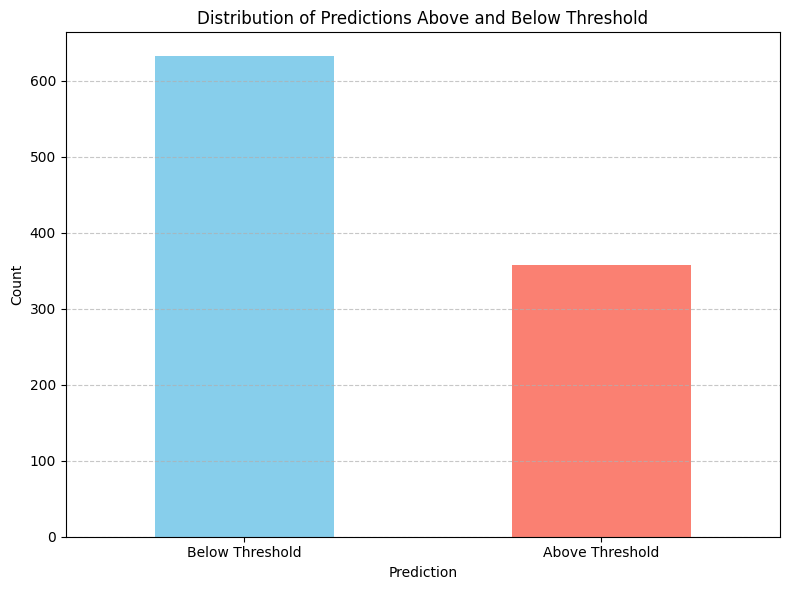

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Define the threshold value
threshold = 0.5  # Adjust this threshold as needed

# Create a new column to indicate if the prediction is above or below the threshold
df['Prediction'] = df['Outcome'] > threshold

# Count the number of predictions above and below the threshold
prediction_counts = df['Prediction'].value_counts()

# Plot a bar chart to visualize the prediction distribution
plt.figure(figsize=(8, 6))
prediction_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Predictions Above and Below Threshold')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.xticks([0, 1], ['Below Threshold', 'Above Threshold'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

vilin

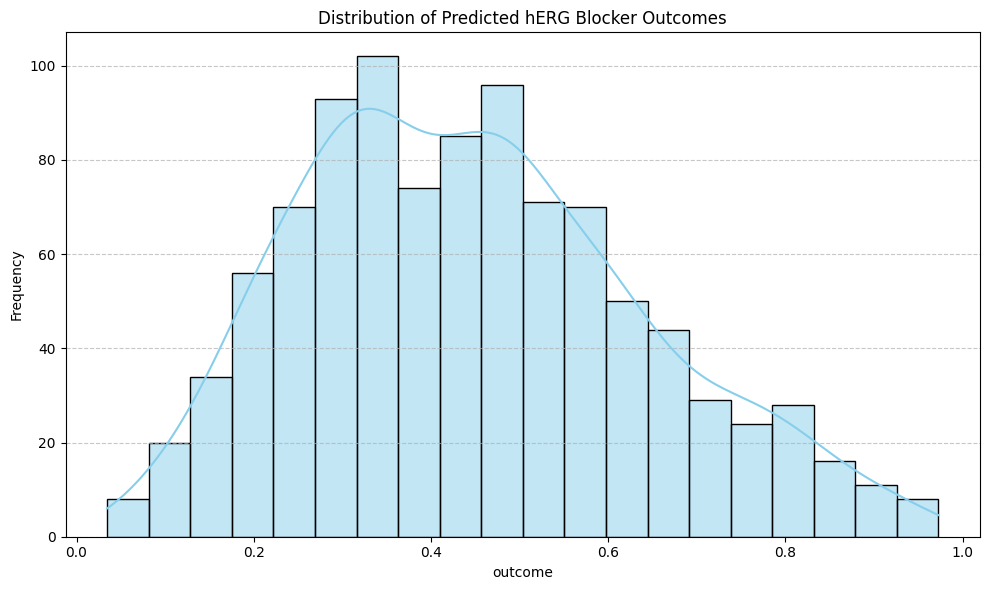

In [21]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Create a histogram to visualize the distribution of predicted hERG blocker outcomes
plt.figure(figsize=(10, 6))
sns.histplot(df['Outcome'], bins=20, kde=True, color='skyblue')
plt.xlabel('outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted hERG Blocker Outcomes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#tOP 10 HERGBLOCKER Molecules

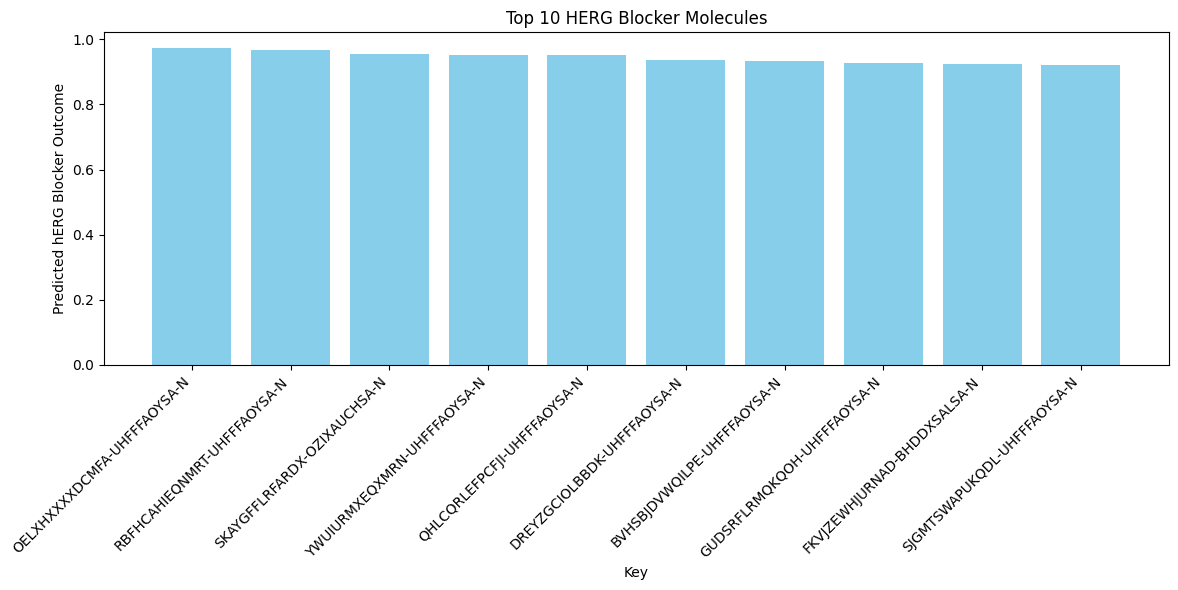

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Sort the molecules based on the predicted outcome in descending order
top_10 = df.sort_values(by='Outcome', ascending=False).head(10)

# Create a column chart to visualize the top 10 molecules
plt.figure(figsize=(12, 6))
plt.bar(top_10['Key'], top_10['Outcome'], color='skyblue')
plt.xlabel('Key')
plt.ylabel('Predicted hERG Blocker Outcome')
plt.title('Top 10 HERG Blocker Molecules')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#Top 10 non HERG Blocker molecules

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Filter out the non-HERG blockers
non_herg_blockers = df[df['Outcome'] < 0.5].nlargest(20, 'Outcome')

# Create a column chart to visualize the top 20 non-HERG blockers
plt.figure(figsize=(12, 6))
plt.bar(non_herg_blockers['KEY'], non_herg_blockers['Outcome'], color='green')
plt.xlabel('Key')
plt.ylabel('Outcome')
plt.title('Top 20 Non-HERG Blockers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

KeyError: 'KEY'

<Figure size 1200x600 with 0 Axes>